# Customer Churn Prediction


### Customer churn poses a significant challenge for businesses across industries such as telecom, retail, banking, and subscription services. With intense competition, customers can easily switch to competitors, leading to high churn rates, lost revenue, and increased customer acquisition costs.


### The goal of this project is to predict customer churn by analyzing various factors such as payment methods, contract types, and service usage patterns. By identifying customers at risk of leaving, businesses can take proactive measures to retain them.


### Using machine learning techniques, the project analyzes historical customer data to uncover key predictors of churn. This allows businesses to implement targeted retention strategies, such as offering personalized discounts or improving customer service, reducing churn and increasing customer loyalty.

## Loading data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')


In [6]:
pd.set_option('display.max_columns', 30)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.duplicated().sum()

0

In [3]:
def get_unique_values(df, features):
    unique_values = {}
    for feature in features:
        unique_values[feature] = df[feature].unique().tolist()  # Convert to list for easier handling
    return unique_values

# Define the categorical features
categorical_features = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Fetch unique values for categorical features
unique_values = {feature: df[feature].unique().tolist() for feature in categorical_features}

# Display unique values for each feature
for feature, values in unique_values.items():
    print(f"{feature}: {values}")


gender: ['Female', 'Male']
SeniorCitizen: [0, 1]
Partner: ['Yes', 'No']
Dependents: ['No', 'Yes']
PhoneService: ['No', 'Yes']
MultipleLines: ['No phone service', 'No', 'Yes']
InternetService: ['DSL', 'Fiber optic', 'No']
OnlineSecurity: ['No', 'Yes', 'No internet service']
OnlineBackup: ['Yes', 'No', 'No internet service']
DeviceProtection: ['No', 'Yes', 'No internet service']
TechSupport: ['No', 'Yes', 'No internet service']
StreamingTV: ['No', 'Yes', 'No internet service']
StreamingMovies: ['No', 'Yes', 'No internet service']
Contract: ['Month-to-month', 'One year', 'Two year']
PaperlessBilling: ['Yes', 'No']
PaymentMethod: ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Churn: ['No', 'Yes']


## EDA

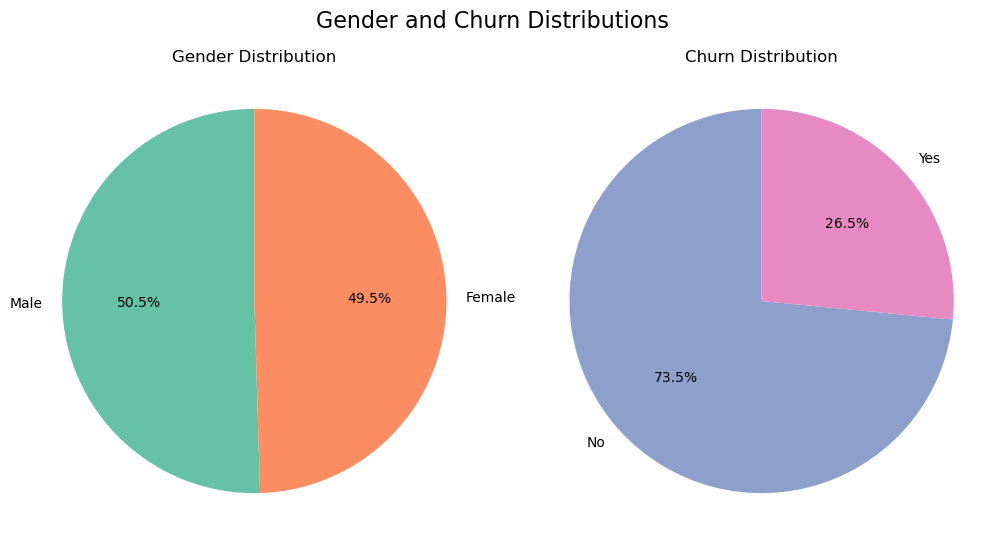

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
# df = pd.read_csv('your_file.csv')  # Load your dataset here

# Calculate distributions
gender_counts = df['gender'].value_counts()
churn_counts = df['Churn'].value_counts()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gender pie chart
axs[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[0].set_title('Gender Distribution')

# Churn pie chart
axs[1].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#8da0cb', '#e78ac3'])
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[1].set_title('Churn Distribution')

# Show the plot
plt.suptitle('Gender and Churn Distributions', fontsize=16)
plt.show()


[1869, 5174]


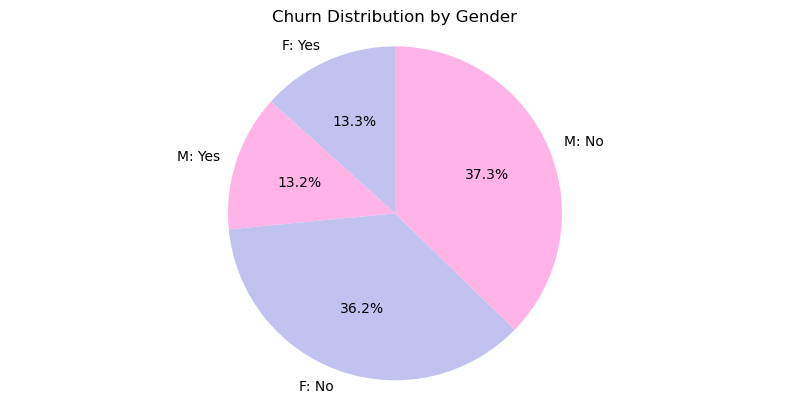

In [52]:
import pandas as pd
import matplotlib.pyplot as plt


# Churn counts for Male and Female
churn_counts = df["Churn"].value_counts()
gender_counts = df.groupby('gender')['Churn'].value_counts().unstack(fill_value=0)

# Values for churn distribution pie chart
values = [churn_counts['Yes'], churn_counts['No']]
labels = ["Churn: Yes", "Churn: No"]

# Values for gender distribution within churn groups
sizes_gender = [gender_counts.loc['Female', 'Yes'], gender_counts.loc['Male', 'Yes'], 
                gender_counts.loc['Female', 'No'], gender_counts.loc['Male', 'No']]
labels_gender = ["F: Yes", "M: Yes", "F: No", "M: No"]

# Colors for the pie charts
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0', '#ffb3e6', '#c2c2f0', '#ffb3e6']

# Create a figure with two pie charts
plt.figure(figsize=(8, 8))


# Gender Distribution Pie Chart
plt.subplot(2, 1, 1) 
plt.pie(sizes_gender, labels=labels_gender, autopct='%1.1f%%', colors=colors_gender, startangle=90)
plt.title('Churn Distribution by Gender')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.tight_layout()
plt.show()


The churn rates for males and females are nearly identical, indicating a balanced impact of churn across genders.

# How does gender affect churn rates?

Churn counts by Gender:
Churn         No       Yes
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603


<Axes: title={'center': 'Churn Rate by Gender'}, xlabel='gender', ylabel='Proportion'>

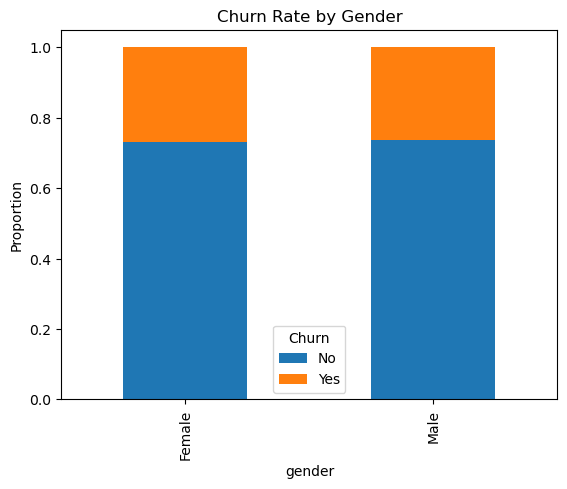

In [55]:


churn_by_gender = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack()
print("Churn counts by Gender:")
print(churn_by_gender)

churn_by_gender.plot(kind='bar', stacked=True, title='Churn Rate by Gender', ylabel='Proportion')

# Is there a relationship between being a senior citizen and churn?


Churn counts by Senior Citizen Status:
Churn                No       Yes
SeniorCitizen                    
0              0.763938  0.236062
1              0.583187  0.416813


<Axes: title={'center': 'Churn Rate by Senior Citizen Status'}, xlabel='SeniorCitizen', ylabel='Proportion'>

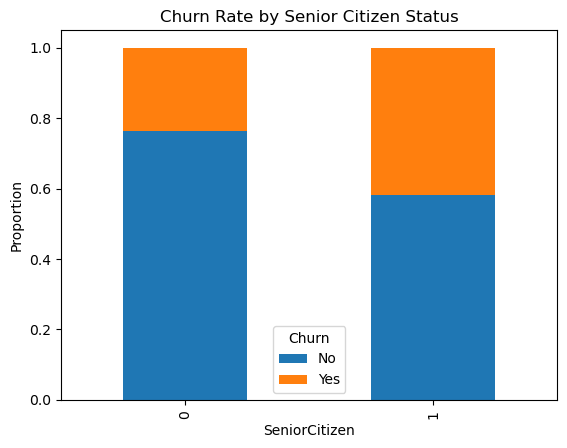

In [56]:
churn_by_senior = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()
print("\nChurn counts by Senior Citizen Status:")
print(churn_by_senior)
churn_by_senior.plot(kind='bar', stacked=True, title='Churn Rate by Senior Citizen Status', ylabel='Proportion')


# Does having a partner or dependents affect churn rates?


Churn counts by Partner Status:
Churn          No       Yes
Partner                    
No       0.670420  0.329580
Yes      0.803351  0.196649

Churn counts by Dependents Status:
Churn             No       Yes
Dependents                    
No          0.687209  0.312791
Yes         0.845498  0.154502


<Axes: title={'center': 'Churn Rate by Dependents Status'}, xlabel='Dependents', ylabel='Proportion'>

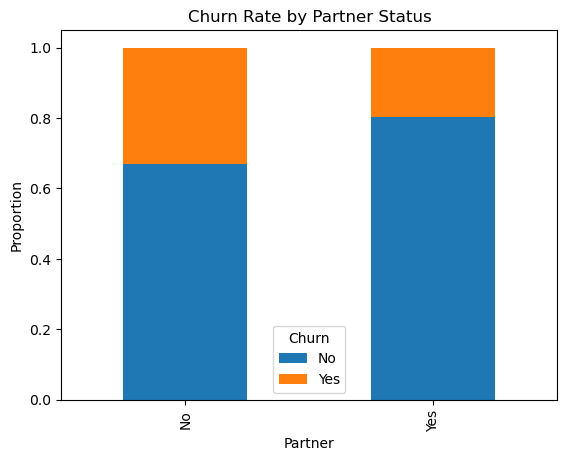

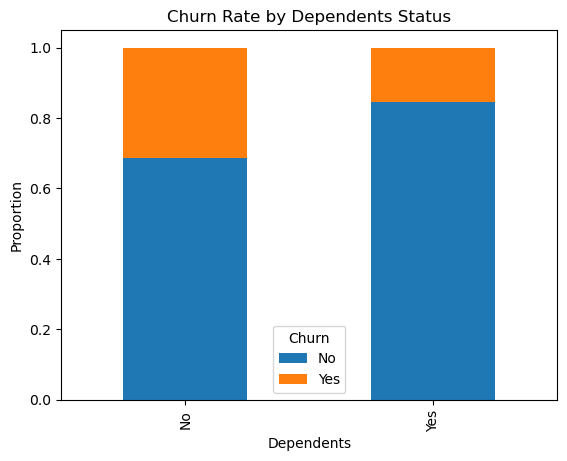

In [58]:
churn_by_partner = df.groupby('Partner')['Churn'].value_counts(normalize=True).unstack()
print("\nChurn counts by Partner Status:")
print(churn_by_partner)
churn_by_partner.plot(kind='bar', stacked=True, title='Churn Rate by Partner Status', ylabel='Proportion')

churn_by_dependents = df.groupby('Dependents')['Churn'].value_counts(normalize=True).unstack()
print("\nChurn counts by Dependents Status:")
print(churn_by_dependents)
churn_by_dependents.plot(kind='bar', stacked=True, title='Churn Rate by Dependents Status', ylabel='Proportion')


# Does the type of contract influence churn rates?


Churn counts by Contract Type:
Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319


<Axes: title={'center': 'Churn Rate by Contract Type'}, xlabel='Contract', ylabel='Proportion'>

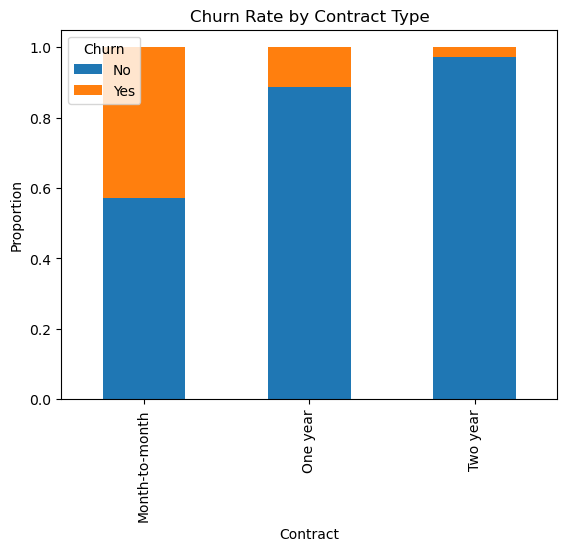

In [60]:
churn_by_contract = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
print("\nChurn counts by Contract Type:")
print(churn_by_contract)
churn_by_contract.plot(kind='bar', stacked=True, title='Churn Rate by Contract Type', ylabel='Proportion')



Churn counts by Internet Service:
Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113


<Figure size 1000x600 with 0 Axes>

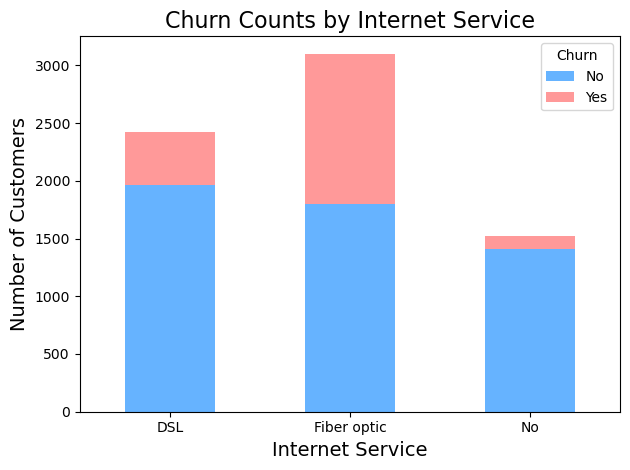

In [61]:


# Group by Internet Service and Churn, then count occurrences
churn_counts = df.groupby('InternetService')['Churn'].value_counts().unstack().fillna(0)

# Print the churn counts for each Internet Service
print("\nChurn counts by Internet Service:")
print(churn_counts)

# Visualization
plt.figure(figsize=(10, 6))
churn_counts.plot(kind='bar', stacked=True, color=['#66b3ff', '#ff9999'])
plt.title('Churn Counts by Internet Service', fontsize=16)
plt.xlabel('Internet Service', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(rotation=0)  # Rotate x labels to horizontal
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()



Churn counts by Tech Support:
Churn                  No   Yes
TechSupport                    
No                   2027  1446
No internet service  1413   113
Yes                  1734   310


<Figure size 1000x600 with 0 Axes>

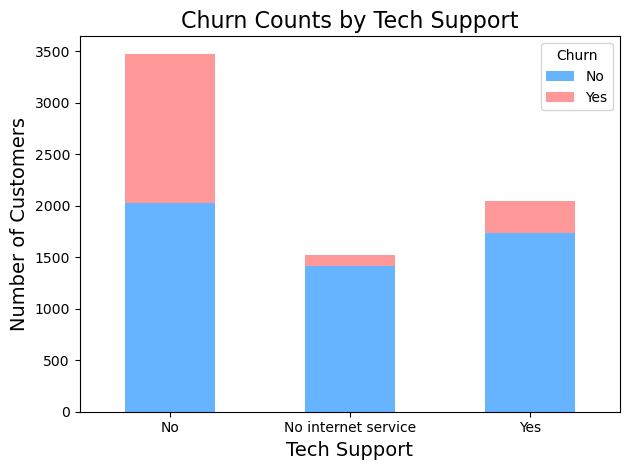

In [62]:
# Group by TechSupport and Churn, then count occurrences
churn_counts_techsupport = df.groupby('TechSupport')['Churn'].value_counts().unstack().fillna(0)

# Print the churn counts for each Tech Support status
print("\nChurn counts by Tech Support:")
print(churn_counts_techsupport)

# Visualization
plt.figure(figsize=(10, 6))
churn_counts_techsupport.plot(kind='bar', stacked=True, color=['#66b3ff', '#ff9999'])
plt.title('Churn Counts by Tech Support', fontsize=16)
plt.xlabel('Tech Support', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(rotation=0)  # Rotate x labels to horizontal
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

NaN values in TotalCharges: 0
Count of customers who churned: 1869
Count of customers who did not churn: 5163


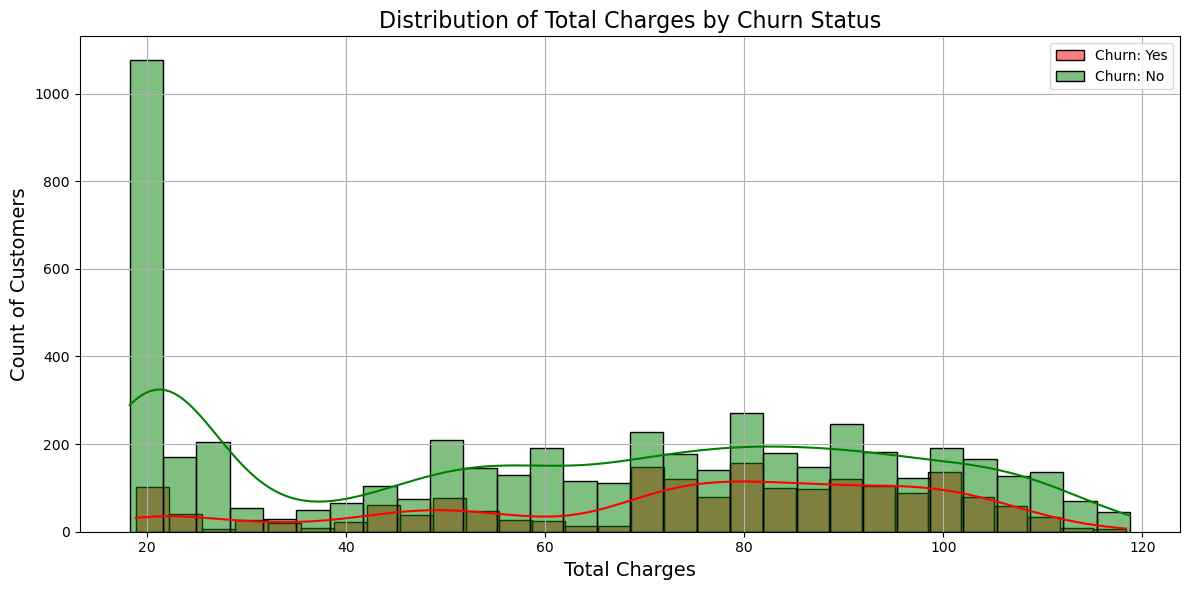

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for NaN values
print(f"NaN values in TotalCharges: {df['TotalCharges'].isna().sum()}")

# Drop NaN values from TotalCharges
df = df.dropna(subset=['TotalCharges'])

# Count of customers who churned and not churned
churn_counts = df['Churn'].value_counts()
print(f"Count of customers who churned: {churn_counts['Yes']}")
print(f"Count of customers who did not churn: {churn_counts['No']}")

# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for customers who churned
sns.histplot(df[df['Churn'] == 'Yes']['TotalCharges'], bins=30, color='red', label='Churn: Yes', kde=True, stat='count')

# Histogram for customers who did not churn
sns.histplot(df[df['Churn'] == 'No']['TotalCharges'], bins=30, color='green', label='Churn: No', kde=True, stat='count')

# Adding titles and labels
plt.title('Distribution of Total Charges by Churn Status', fontsize=16)
plt.xlabel('Total Charges', fontsize=14)
plt.ylabel('Count of Customers', fontsize=14)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


# Data Transformation and Modeling using SnowPark

In [8]:
pip install snowflake-snowpark-python


  Obtaining dependency information for snowflake-snowpark-python from https://files.pythonhosted.org/packages/1c/1e/c78cf80cc17dfe32bd89d8c5b7d86982571d58b4d8399bfecb8296e60bf1/snowflake_snowpark_python-1.22.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 2.1 MB/s eta 0:00:002.8 MB/s eta 0:00:01
  Obtaining dependency information for snowflake-connector-python<4.0.0,>=3.10.0 from https://files.pythonhosted.org/packages/4a/4c/b32f3598b6990ed6386c7f34d094a2eb5b87aed601c8f6223b4e1f555597/snowflake_connector_python-3.12.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 6.3 MB/s eta 0:00:00
  Obtaining dependency information for asn1crypto<2.0.0,>0.24.0 from https://files.pythonhosted.org/packages/c9/7f/09065fd9e27da0eda08b4d6897f1c13535066174cc023af248fc2a8d5e5a/asn1crypto-1.5.1-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.7 MB/s eta 0:00:00 MB/s eta 0:00:0

In [9]:
from snowflake.snowpark import Session


In [10]:
# Define connection parameters
connection_parameters = {
    "account": "gub65544******",
    "user": "$$$$$$$",
    "password": "***********",
    "role": "ACCOUNTADMIN",
    "warehouse": "COMPUTE_WH",
    "database": "CUSTOMER",
    "schema": "CUSTOMER_SCHEMA"
}

# Create a session
session = Session.builder.configs(connection_parameters).create()


In [11]:
# Add necessary packages to the Snowpark session
session.add_packages(["pandas", "numpy", "scikit-learn"])  # Add other packages as needed


The version of package 'scikit-learn' in the local environment is 1.4.1.post1, which does not fit the criteria for the requirement 'scikit-learn'. Your UDF might not work when the package version is different between the server and your local environment.


In [13]:
# Load the churn_data table into a Snowpark DataFrame
churn_df = session.table("churn_data")


In [17]:
# Step 1: Inspect the Data
churn_df.show()  # This will display the first 10 rows by default


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"CUSTOMERID"  |"GENDER"  |"SENIORCITIZEN"  |"PARTNER"  |"DEPENDENTS"  |"TENURE"  |"PHONESERVICE"  |"MULTIPLELINES"   |"INTERNETSERVICE"  |"ONLINESECURITY"  |"ONLINEBACKUP"  |"DEVICEPROTECTION"  |"TECHSUPPORT"  |"STREAMINGTV"  |"STREAMINGMOVIES"  |"CONTRACT"      |"PAPERLESSBILLING"  |"PAYMENTMETHOD"            |"MONTHLYCHARGES"  |"TOTALCHARGES"  |"CHURN"  |
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [67]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from snowflake.snowpark import Session


# Split the data into training (70%) and testing (30%) sets
train_df, test_df = churn_df.random_split([0.7, 0.3], seed=42)

# Convert Snowpark DataFrames to pandas DataFrames for fitting the pipeline
train_df_pd = train_df.to_pandas()

# Check the columns in the DataFrame
print("Columns in Training DataFrame:", train_df_pd.columns.tolist())

# Verify if the columns exist before dropping
columns_to_drop = ['CUSTOMERID', 'CHURN']
existing_columns = [col for col in columns_to_drop if col in train_df_pd.columns]

# Separate features and target variable if the columns exist
if existing_columns:
    train_features = train_df_pd.drop(columns=existing_columns)
    train_target = train_df_pd['CHURN'] if 'CHURN' in train_df_pd.columns else None
else:
    print("Columns to drop not found in the DataFrame!")

# Convert TotalCharges to numeric, forcing errors to NaN
train_features['TOTALCHARGES'] = pd.to_numeric(train_features['TOTALCHARGES'], errors='coerce')

# Identify categorical and numerical features
categorical_features = train_features.select_dtypes(include=['object']).columns.tolist()
numerical_features = train_features.select_dtypes(exclude=['object']).columns.tolist()

# Define the transformation pipeline for categorical features
class LabelEncoderTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.encoders = {col: LabelEncoder().fit(X[col]) for col in X.columns}
        return self

    def transform(self, X):
        return X.apply(lambda col: self.encoders[col.name].transform(col) if col.name in self.encoders else col)

    def get_params(self, deep=True):
        return {}

# Define the full preprocessing pipeline
from sklearn.impute import SimpleImputer

# Define the full preprocessing pipeline with an imputer for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', LabelEncoderTransformer(), categorical_features),
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
            ('scaler', StandardScaler())  # StandardScaler for numerical features
        ]), numerical_features)
    ],
    remainder='passthrough'  # Pass through any non-specified columns
)


# Define the main pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # Add your model step here, e.g., ('model', SomeEstimator())
])

# Fit the pipeline on the training data only if train_target is not None
if train_target is not None:
    pipeline.fit(train_features, train_target)
    print("Pipeline fitted successfully!")
else:
    print("Target variable 'Churn' not found in the training DataFrame.")

# To transform the test data or new data, use:
# test_features = test_df.to_pandas()
# test_features['TotalCharges'] = pd.to_numeric(test_features['TotalCharges'], errors='coerce')
# transformed_test_data = pipeline.transform(test_features)


Columns in Training DataFrame: ['CUSTOMERID', 'GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS', 'TENURE', 'PHONESERVICE', 'MULTIPLELINES', 'INTERNETSERVICE', 'ONLINESECURITY', 'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT', 'STREAMINGTV', 'STREAMINGMOVIES', 'CONTRACT', 'PAPERLESSBILLING', 'PAYMENTMETHOD', 'MONTHLYCHARGES', 'TOTALCHARGES', 'CHURN']
Pipeline fitted successfully!


# Modeling using Logistic Regression

In [69]:
# Import necessary libraries for the model
from sklearn.linear_model import LogisticRegression
from snowflake.snowpark import Session
from sklearn.metrics import accuracy_score, classification_report


# Create a Logistic Regression model
logistic_model = LogisticRegression()

# Fit the Logistic Regression model on the training data
if train_target is not None:
    # Transform the training features
    train_features_transformed = preprocessor.fit_transform(train_features)
    logistic_model.fit(train_features_transformed, train_target)
    print("Logistic Regression model fitted successfully!")

    # Convert Snowpark DataFrame to pandas DataFrame for the testing set
    test_df_pd = test_df.to_pandas()  # Convert the test set to pandas DataFrame

    # Check the columns in the test DataFrame
    print("Columns in Testing DataFrame:", test_df_pd.columns.tolist())

    # Prepare test data for prediction
    test_features = test_df_pd.drop(columns=columns_to_drop)
    test_features['TOTALCHARGES'] = pd.to_numeric(test_features['TOTALCHARGES'], errors='coerce')

    # Transform the test features
    test_features_transformed = preprocessor.transform(test_features)
    
    # Make predictions
    predictions_lr = logistic_model.predict(test_features_transformed)

    # Evaluate the model
    accuracy_lr = accuracy_score(test_df_pd['CHURN'], predictions_lr)
    print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
    print(classification_report(test_df_pd['CHURN'], predictions_lr))
else:
    print("Target variable 'Churn' not found in the training DataFrame.")



Logistic Regression model fitted successfully!
Columns in Testing DataFrame: ['CUSTOMERID', 'GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS', 'TENURE', 'PHONESERVICE', 'MULTIPLELINES', 'INTERNETSERVICE', 'ONLINESECURITY', 'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT', 'STREAMINGTV', 'STREAMINGMOVIES', 'CONTRACT', 'PAPERLESSBILLING', 'PAYMENTMETHOD', 'MONTHLYCHARGES', 'TOTALCHARGES', 'CHURN']
Logistic Regression Accuracy: 0.80
              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1577
         Yes       0.66      0.54      0.60       575

    accuracy                           0.80      2152
   macro avg       0.75      0.72      0.73      2152
weighted avg       0.79      0.80      0.80      2152



# Modeling using Random Forest

In [88]:

# Import necessary libraries for the model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
random_forest_model = RandomForestClassifier()
# Fit the Random Forest model on the training data
if train_target is not None:
    # Transform the training features
    train_features_transformed = preprocessor.fit_transform(train_features)
    random_forest_model.fit(train_features_transformed, train_target)
    print("Random Forest model fitted successfully!")

    # Convert Snowpark DataFrame to pandas DataFrame for the testing set
    test_df_pd = test_df.to_pandas()  # Convert the test set to pandas DataFrame

    # Check the columns in the test DataFrame
    print("Columns in Testing DataFrame:", test_df_pd.columns.tolist())

    # Prepare test data for prediction
    test_features = test_df_pd.drop(columns=columns_to_drop)
    test_features['TOTALCHARGES'] = pd.to_numeric(test_features['TOTALCHARGES'], errors='coerce')

    # Transform the test features
    test_features_transformed = preprocessor.transform(test_features)
    
    # Make predictions
    predictions_rf = random_forest_model.predict(test_features_transformed)

    # Evaluate the model
    accuracy_rf = accuracy_score(test_df_pd['CHURN'], predictions_rf)
    print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
    print(classification_report(test_df_pd['CHURN'], predictions_rf))
else:
    print("Target variable 'Churn' not found in the training DataFrame.")


Random Forest model fitted successfully!
Columns in Testing DataFrame: ['CUSTOMERID', 'GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS', 'TENURE', 'PHONESERVICE', 'MULTIPLELINES', 'INTERNETSERVICE', 'ONLINESECURITY', 'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT', 'STREAMINGTV', 'STREAMINGMOVIES', 'CONTRACT', 'PAPERLESSBILLING', 'PAYMENTMETHOD', 'MONTHLYCHARGES', 'TOTALCHARGES', 'CHURN']
Random Forest Accuracy: 0.79
              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1577
         Yes       0.64      0.50      0.56       575

    accuracy                           0.79      2152
   macro avg       0.74      0.70      0.71      2152
weighted avg       0.78      0.79      0.78      2152



## Hyperparameter Tuning Logistic Regression model

In [74]:
# Define the Logistic Regression model
logistic_model = LogisticRegression(solver='saga', max_iter=1000)

# Create a pipeline with the preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', logistic_model)
])

# Hyperparameter grid for tuning
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'model__penalty': ['l2', 'l1']         # Regularization type
}

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=5, n_jobs=-1, return_train_score=True)

# Fit the model
grid_search.fit(train_features, train_target)

# Create a DataFrame from the grid search results
results_df = pd.DataFrame(grid_search.cv_results_)

# Extract relevant columns for hyperparameters and scores
results_df = results_df[['param_model__C', 'param_model__penalty', 'mean_train_score', 'mean_test_score']].copy()

# Rename columns for clarity
results_df.columns = ['C', 'Penalty', 'Train Accuracy', 'Test Accuracy']

# Prepare test data for prediction
test_df_pd = test_df.to_pandas()  # Convert the test set to pandas DataFrame
test_features = test_df_pd.drop(columns=columns_to_drop)
test_features['TOTALCHARGES'] = pd.to_numeric(test_features['TOTALCHARGES'], errors='coerce')

# Transform the test features
test_features_transformed = grid_search.best_estimator_.named_steps['preprocessor'].transform(test_features)

# Calculate test accuracy for each hyperparameter combination
test_accuracies = []

for index, row in results_df.iterrows():
    # Set the hyperparameters for the model
    model = LogisticRegression(C=row['C'], penalty=row['Penalty'], solver='saga', max_iter=1000)
    
    # Fit the model on the transformed training data
    train_features_transformed = grid_search.best_estimator_.named_steps['preprocessor'].transform(train_features)
    model.fit(train_features_transformed, train_target)
    
    # Calculate test accuracy
    test_accuracy = model.score(test_features_transformed, test_df_pd['CHURN'])
    test_accuracies.append(test_accuracy)

# Add Test Accuracy to the results DataFrame
results_df['Test Accuracy'] = test_accuracies

# Display the final DataFrame
results_df

,C,Penalty,Train Accuracy,Test Accuracy
0,0.01,l2,0.801114,0.802045
1,0.01,l1,0.794674,0.790892
2,0.1,l2,0.804794,0.802045
3,0.1,l1,0.804181,0.801115
4,1,l2,0.805050,0.801115
5,1,l1,0.804999,0.801580
6,10,l2,0.804539,0.801580
7,10,l1,0.804386,0.801580
8,100,l2,0.804437,0.801580
9,100,l1,0.804437,0.801580


## Hyperparameter Tuning Random Forest model

In [86]:
# Create a Random Forest model
random_forest_model = RandomForestClassifier()

# Create a pipeline with the preprocessor and model
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', random_forest_model)
])

# Hyperparameter grid for tuning
param_grid_rf = {
    'model__n_estimators': [50, 100, 200],  # Number of trees
    'model__max_depth': [None, 10, 20, 30],  # Max depth of the trees
    'model__min_samples_split': [2, 5, 10],  # Min samples required to split a node
}

# Set up GridSearchCV
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, scoring='accuracy', cv=5, n_jobs=-1, return_train_score=True)

# Fit the model
grid_search_rf.fit(train_features, train_target)

# Create a DataFrame from the grid search results
results_rf_df = pd.DataFrame(grid_search_rf.cv_results_)

# Extract relevant columns for hyperparameters and scores
results_rf_df = results_rf_df[['param_model__n_estimators', 'param_model__max_depth', 'param_model__min_samples_split', 'mean_train_score', 'mean_test_score']].copy()

# Rename columns for clarity
results_rf_df.columns = ['n_estimators', 'Max Depth', 'Min Samples Split', 'Train Accuracy', 'Test Accuracy']

# Prepare test data for prediction
test_df_pd = test_df.to_pandas()  # Convert the test set to pandas DataFrame
test_features = test_df_pd.drop(columns=columns_to_drop)
test_features['TOTALCHARGES'] = pd.to_numeric(test_features['TOTALCHARGES'], errors='coerce')

# Transform the test features
test_features_transformed_rf = grid_search_rf.best_estimator_.named_steps['preprocessor'].transform(test_features)

# Calculate test accuracy for each hyperparameter combination
test_accuracies_rf = []

for index, row in results_rf_df.iterrows():
    # Set the hyperparameters for the model
    model_rf = RandomForestClassifier(
        n_estimators=row['n_estimators'], 
        max_depth=row['Max Depth'], 
        min_samples_split=row['Min Samples Split']
    )
    
    # Fit the model on the transformed training data
    train_features_transformed_rf = grid_search_rf.best_estimator_.named_steps['preprocessor'].transform(train_features)
    model_rf.fit(train_features_transformed_rf, train_target)
    
    # Calculate test accuracy
    test_accuracy_rf = model_rf.score(test_features_transformed_rf, test_df_pd['CHURN'])
    test_accuracies_rf.append(test_accuracy_rf)

# Add Test Accuracy to the results DataFrame
results_rf_df['Test Accuracy'] = test_accuracies_rf

# Display the final DataFrame
print(results_rf_df)

   n_estimators Max Depth Min Samples Split  Train Accuracy  Test Accuracy
0            50      None                 2        0.997495       0.784387
1           100      None                 2        0.998109       0.794610
2           200      None                 2        0.998109       0.793216
3            50      None                 5        0.962635       0.791822
4           100      None                 5        0.964986       0.794145
5           200      None                 5        0.967389       0.793216
6            50      None                10        0.910550       0.790892
7           100      None                10        0.910652       0.798792
8           200      None                10        0.911163       0.792286
9            50        10                 2        0.910243       0.792286
10          100        10                 2        0.912594       0.797862
11          200        10                 2        0.914434       0.805762
12           50        10

In [76]:
import joblib 

# Final model training and evaluation

In [77]:
# Create a Random Forest model with specific parameters
random_forest_model = RandomForestClassifier(
    n_estimators=50,        # Set to 50
    max_depth=None,         # Set to None
    min_samples_split=10    # Set to 10
)

# Fit the Random Forest model
if train_target is not None:
    # Transform the training features
    train_features_transformed = preprocessor.fit_transform(train_features)
    random_forest_model.fit(train_features_transformed, train_target)
    print("Random Forest model fitted successfully!")

    # Convert Snowpark DataFrame to pandas DataFrame for the testing set
    test_df_pd = test_df.to_pandas()  # Convert the test set to pandas DataFrame

    # Check the columns in the test DataFrame
    print("Columns in Testing DataFrame:", test_df_pd.columns.tolist())

    # Prepare test data for prediction
    test_features = test_df_pd.drop(columns=columns_to_drop)
    test_features['TOTALCHARGES'] = pd.to_numeric(test_features['TOTALCHARGES'], errors='coerce')

    # Transform the test features
    test_features_transformed = preprocessor.transform(test_features)
    
    # Make predictions
    predictions_rf = random_forest_model.predict(test_features_transformed)

    # Evaluate the model
    accuracy_train = random_forest_model.score(train_features_transformed, train_target)  # Training accuracy
    accuracy_test = accuracy_score(test_df_pd['CHURN'], predictions_rf)  # Testing accuracy
    print(f"Random Forest Training Accuracy: {accuracy_train:.2f}")
    print(f"Random Forest Testing Accuracy: {accuracy_test:.2f}")
    print(classification_report(test_df_pd['CHURN'], predictions_rf))

    # Create a DataFrame for the results
    results_df = pd.DataFrame({
        'n_estimators': [50],
        'max_depth': [None],
        'min_samples_split': [10],
        'Train Accuracy': [accuracy_train],
        'Test Accuracy': [accuracy_test]
    })

    # Display the results DataFrame
    print(results_df)

    # Save the model using joblib
    joblib.dump(random_forest_model, 'random_forest_model.pkl')
    print("Model saved as 'random_forest_model.pkl'")

else:
    print("Target variable 'Churn' not found in the training DataFrame.")

Random Forest model fitted successfully!
Columns in Testing DataFrame: ['CUSTOMERID', 'GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS', 'TENURE', 'PHONESERVICE', 'MULTIPLELINES', 'INTERNETSERVICE', 'ONLINESECURITY', 'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT', 'STREAMINGTV', 'STREAMINGMOVIES', 'CONTRACT', 'PAPERLESSBILLING', 'PAYMENTMETHOD', 'MONTHLYCHARGES', 'TOTALCHARGES', 'CHURN']
Random Forest Training Accuracy: 0.91
Random Forest Testing Accuracy: 0.80
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1577
         Yes       0.67      0.50      0.57       575

    accuracy                           0.80      2152
   macro avg       0.75      0.71      0.72      2152
weighted avg       0.79      0.80      0.79      2152

   n_estimators max_depth  min_samples_split  Train Accuracy  Test Accuracy
0            50      None                 10        0.907994       0.800651
Model saved as 'random_forest_model.pkl'


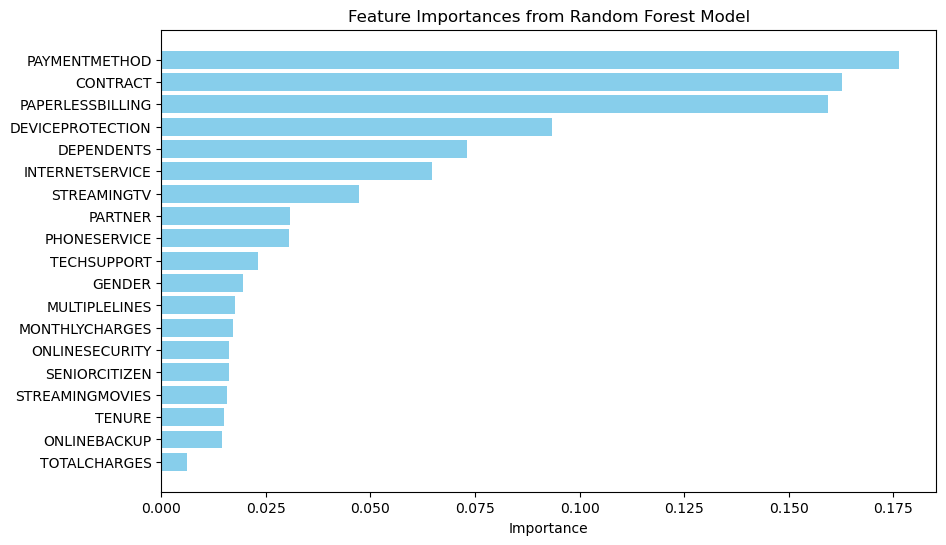

In [83]:
# Display feature importances
feature_importances = random_forest_model.feature_importances_
# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
        'Feature': list(numerical_features) + list(categorical_features),
        'Importance': feature_importances
    })
    
    # Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.show()

In [84]:
feature_importances

array([0.01617644, 0.01486044, 0.01702514, 0.00613924, 0.01944806,
       0.03086982, 0.07316544, 0.03055994, 0.01770822, 0.06464951,
       0.01625587, 0.01460932, 0.09351681, 0.02318833, 0.04733914,
       0.01578008, 0.16284281, 0.15939246, 0.17647293])

In [94]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

In [97]:
import pandas as pd

# Group by 'PaymentMethod' and calculate the churn rate
churn_by_payment_method = df.groupby('PaymentMethod')['Churn'].agg(
    total_customers='count',
    churned_customers='sum',
    churn_rate=lambda x: x.mean()  # Calculate the churn rate
).reset_index()

# Display the churn rates based on payment method
print(churn_by_payment_method)


               PaymentMethod  total_customers  churned_customers  churn_rate
0  Bank transfer (automatic)             1542                258    0.167315
1    Credit card (automatic)             1521                232    0.152531
2           Electronic check             2365               1071    0.452854
3               Mailed check             1604                308    0.192020


#### The high importance of the payment method in predicting churn suggests that customers who use electronic checks or mailed checks may experience more friction or dissatisfaction compared to those who use automated payment methods. This could indicate that manual payment processes are less convenient, leading to frustration and potential disengagement. Businesses should investigate the payment experiences of these customers, consider enhancing the reliability and ease of payment processes, and proactively address any issues that may lead to churn, ensuring a smoother experience for all payment types.

In [98]:

session.sql("CREATE OR REPLACE STAGE ml_output_stage;").collect()
print("Stage 'ml_output_stage' created successfully.")

Stage 'ml_output_stage' created successfully.


In [104]:
import os
import joblib
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from snowflake.snowpark import Session



# Create a Snowflake session
session = Session.builder.configs(connection_parameters).create()

# Load your training data into a Snowpark DataFrame (replace this with your actual data loading method)
churn_df = session.table("churn_data")

# Split the data into training (70%) and testing (30%) sets
train_df, test_df = churn_df.random_split([0.7, 0.3], seed=42)

# Convert Snowpark DataFrames to pandas DataFrames for fitting the pipeline
train_df_pd = train_df.to_pandas()

# Drop unnecessary columns
columns_to_drop = ['CUSTOMERID', 'CHURN']
train_features = train_df_pd.drop(columns=columns_to_drop)
train_target = train_df_pd['CHURN']

# Convert TotalCharges to numeric
train_features['TOTALCHARGES'] = pd.to_numeric(train_features['TOTALCHARGES'], errors='coerce')

# Identify categorical and numerical features
categorical_features = train_features.select_dtypes(include=['object']).columns.tolist()
numerical_features = train_features.select_dtypes(exclude=['object']).columns.tolist()

# Define the transformation pipeline for categorical features
class LabelEncoderTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.encoders = {col: LabelEncoder().fit(X[col]) for col in X.columns}
        return self

    def transform(self, X):
        return X.apply(lambda col: self.encoders[col.name].transform(col) if col.name in self.encoders else col)

# Define the full preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', LabelEncoderTransformer(), categorical_features),
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler())  # StandardScaler for numerical features
        ]), numerical_features)
    ],
    remainder='passthrough'  # Pass through any non-specified columns
)

# Define the main pipeline with a Random Forest model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=50, min_samples_split=10))
])

# Fit the pipeline on the training data
pipeline.fit(train_features, train_target)
print("Pipeline fitted successfully!")

# Step 2: Save the pipeline as a .pkl file locally
model_filename = 'pipeline_model.pkl'
joblib.dump(pipeline, model_filename)
print(f"Pipeline saved as '{model_filename}'")
# Step 3: Upload the pipeline model to the Snowflake stage
# Define the model file name (ensure there's no space in the name)
model_filename = "pipeline_model.pkl"  # Use the name you saved the pipeline with

# Step: Upload the pipeline model to the Snowflake stage
try:
    # Directly use the relative path
    model_file_path = f"file://{model_filename}"  # Assuming you are in the current directory

    # Debugging: Print the command being run
    print(f"Uploading model file from: {model_file_path} to stage: ml_output_stage")
    
    # Use the PUT command to upload the model
    session.sql(f"PUT {model_file_path} @ml_output_stage;").collect()
    print("Pipeline model uploaded to 'ml_output_stage'.")
except Exception as e:
    print(f"Error uploading model file: {e}")

# Optional: List files in the stage to verify upload
try:
    files = session.sql("LIST @ml_output_stage;").collect()
    print("Files in 'ml_output_stage':")
    for file in files:
        print(file)
except Exception as e:
    print(f"Error listing files in stage: {e}")


Pipeline fitted successfully!
Pipeline saved as 'pipeline_model.pkl'
Uploading model file from: file://pipeline_model.pkl to stage: ml_output_stage
Pipeline model uploaded to 'ml_output_stage'.
Files in 'ml_output_stage':
Row(name='ml_output_stage/pipeline_model.pkl.gz', size=707072, md5='e9b4521c0b5e700d4b0de50ea42c9bcc', last_modified='Fri, 4 Oct 2024 09:07:45 GMT')


# Steps to Implement Scheduled Model Inference in Snowflake

Load the model from the stage.
Run the inference on new data.
Store the results in a Snowflake table.
Schedule the Stored Procedure: Use Snowflake's Task feature to run the stored procedure every morning at 10 AM.

In [121]:
import pandas as pd
import joblib

# Load your existing Snowflake session

# Load the saved model pipeline
pipeline = joblib.load('pipeline_model.pkl')  # Ensure this is the correct path

# Query to load new data from the new_data_table
query = "SELECT * FROM new_data_table"
new_data_df = session.sql(query).to_pandas()  # Fetch data as a DataFrame

# Print columns for debugging
print("Columns in new_data_df:", new_data_df.columns.tolist())

# Initialize customer_ids variable
customer_ids = None

# Check if 'CUSTOMERID' is in the DataFrame
if 'CUSTOMERID' in new_data_df.columns:
    customer_ids = new_data_df['CUSTOMERID']  # Store customer IDs for later
    new_data_df = new_data_df.drop(columns=['CUSTOMERID'])  # Drop the CUSTOMERID column
else:
    print("Warning: 'CUSTOMERID' column not found in new_data_df. No predictions will be made.")

# Make predictions only if customer_ids is not None and not empty
if customer_ids is not None and not customer_ids.empty:
    predictions = pipeline.predict(new_data_df)

    # Create a DataFrame for the results
    results_df = pd.DataFrame({
        'CUSTOMERID': customer_ids,  # Update to match the DataFrame
        'PREDICTION': predictions
    })

    # Write the results back to Snowflake using INSERT
    for index, row in results_df.iterrows():
        insert_query = f"""
        INSERT INTO predictions_results (CUSTOMERID, PREDICTION)
        VALUES ('{row['CUSTOMERID']}', '{row['PREDICTION']}');
        """
        session.sql(insert_query).collect()  # Execute the insert query

    print("Predictions inserted successfully!")
else:
    print("No customer IDs available to insert predictions.")


Columns in new_data_df: ['CUSTOMERID', 'GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS', 'TENURE', 'PHONESERVICE', 'MULTIPLELINES', 'INTERNETSERVICE', 'ONLINESECURITY', 'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT', 'STREAMINGTV', 'STREAMINGMOVIES', 'CONTRACT', 'PAPERLESSBILLING', 'PAYMENTMETHOD', 'MONTHLYCHARGES', 'TOTALCHARGES']
Predictions inserted successfully!


In [4]:
import joblib
import numpy as np

# Load the model (ensure the path to your model is correct)
model = joblib.load('random_forest_model.pkl')  # Change to your model's path

# Hardcoded input values (adjust these values as needed)
input_data = {
    'gender': 'Female',
    'senior_citizen': 0,
    'partner': 'Yes',
    'dependents': 'No',
    'tenure': 24,
    'phone_service': 'Yes',
    'multiple_lines': 'No',
    'internet_service': 'Fiber optic',
    'online_security': 'Yes',
    'online_backup': 'No',
    'device_protection': 'Yes',
    'tech_support': 'No',
    'streaming_tv': 'Yes',
    'streaming_movies': 'Yes',
    'contract': 'One year',
    'paperless_billing': 'Yes',
    'payment_method': 'Electronic check',
    'monthly_charges': 75.65,
    'total_charges': '1625.70'
}

# Function to preprocess the input data (e.g., label encoding)
def preprocess_input_data(data):
    # Example label encoding (you'll need to replace this with your actual encoders)
    gender_encoded = 1 if data['gender'] == 'Male' else 0
    partner_encoded = 1 if data['partner'] == 'Yes' else 0
    dependents_encoded = 1 if data['dependents'] == 'Yes' else 0
    phone_service_encoded = 1 if data['phone_service'] == 'Yes' else 0
    multiple_lines_encoded = 1 if data['multiple_lines'] == 'Yes' else 0
    internet_service_encoded = {'DSL': 0, 'Fiber optic': 1, 'No': 2}[data['internet_service']]
    online_security_encoded = 1 if data['online_security'] == 'Yes' else 0
    online_backup_encoded = 1 if data['online_backup'] == 'Yes' else 0
    device_protection_encoded = 1 if data['device_protection'] == 'Yes' else 0
    tech_support_encoded = 1 if data['tech_support'] == 'Yes' else 0
    streaming_tv_encoded = 1 if data['streaming_tv'] == 'Yes' else 0
    streaming_movies_encoded = 1 if data['streaming_movies'] == 'Yes' else 0
    contract_encoded = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}[data['contract']]
    paperless_billing_encoded = 1 if data['paperless_billing'] == 'Yes' else 0
    payment_method_encoded = {'Electronic check': 0, 'Mailed check': 1, 
                              'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}[data['payment_method']]
    
    # Prepare the input data for prediction
    processed_input = [
        gender_encoded,
        data['senior_citizen'],
        partner_encoded,
        dependents_encoded,
        data['tenure'],
        phone_service_encoded,
        multiple_lines_encoded,
        internet_service_encoded,
        online_security_encoded,
        online_backup_encoded,
        device_protection_encoded,
        tech_support_encoded,
        streaming_tv_encoded,
        streaming_movies_encoded,
        contract_encoded,
        paperless_billing_encoded,
        payment_method_encoded,
        data['monthly_charges'],
        float(data['total_charges'])
    ]
    
    return np.array(processed_input).reshape(1, -1)  # Reshape for prediction

# Preprocess the input data
input_array = preprocess_input_data(input_data)

# Perform prediction
prediction = model.predict(input_array)

# Display the output
output = "Customer is likely to churn" if prediction[0] == 1 else "Customer is not likely to churn"
print(output)


Customer is not likely to churn


In [5]:
import pickle

model = pickle.load(open("random_forest_model.pkl", "rb"))
print(type(model))


<class 'numpy.ndarray'>
